In [1]:
# Import all neccessar libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, LabelEncoder, OneHotEncoder

Using TensorFlow backend.


In [2]:
# Load the dataset And lets have a look at the first 5 rows
data = pd.read_csv('musk_csv.csv',index_col= 'ID')
data.head()

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
# Lets get some details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 1 to 6598
Columns: 169 entries, molecule_name to class
dtypes: int64(167), object(2)
memory usage: 8.6+ MB


In [4]:
# Let us check if there is any null values in the dataset
data.isnull().sum()

molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 169, dtype: int64

In [0]:
# lets drop the entire row if there is any null values
data.dropna(inplace = True)

In [6]:
# Again lets check for details of dataset to check if there was any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 1 to 6598
Columns: 169 entries, molecule_name to class
dtypes: int64(167), object(2)
memory usage: 8.6+ MB


In [0]:
# No null values where found in the data
# Now we will split the Conformation Name at + & _
 new1 = data["conformation_name"].str.split("_",n = 1,expand = True)
data["conformation_i"] = new1[0]
new2 = new1[1].str.split("+",n = 1,expand = True)
data["conformation_ii"] = new2[0]
data["conformation_iii"] = new2[1]
data.drop(columns = "conformation_name", inplace = True)

In [0]:
# since adding new column gets attached at the end of the table , we will bring them at the beginning
col1 = data.pop('conformation_i')
col2 = data.pop('conformation_ii')
col3 = data.pop('conformation_iii')
data.insert(1, col1.name, col1)
data.insert(2, col2.name, col2)
data.insert(3, col3.name, col3)

In [9]:
# Lets check for the changes
data.head()

,molecule_name,conformation_i,conformation_ii,conformation_iii,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MUSK-211,211,1,1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
2,MUSK-211,211,1,10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
3,MUSK-211,211,1,11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
4,MUSK-211,211,1,12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
5,MUSK-211,211,1,13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [10]:
# since the molecule_name and conformation_i is same we will drop one
del data['conformation_i']
# And encode the other with LabelEncoder and OneHotEncoder
lenc = LabelEncoder()
data["molecule_name"] = lenc.fit_transform(data["molecule_name"])
ohenc = OneHotEncoder(categorical_features=[0])
data = ohenc.fit_transform(data).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [11]:
# since the data is clean and also coverted to array lets have a look at the data
data

array([[   1.,    0.,    0., ..., -112.,   96.,    1.],
       [   1.,    0.,    0., ..., -136.,   79.,    1.],
       [   1.,    0.,    0., ..., -145.,   39.,    1.],
       ...,
       [   0.,    0.,    0., ..., -144.,   -6.,    0.],
       [   0.,    0.,    0., ..., -116.,  117.,    0.],
       [   0.,    0.,    0., ..., -115.,  118.,    0.]])

In [0]:
# Now we will split the data into input and output features
X = data[:,:-1]
y = data[:,-1]

In [0]:
# Before processing the data we will normalize the input data for better accuracy
X = normalize(X)

In [0]:
# Now lets split the data into training and validation set with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80, random_state = 7, stratify = y)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5278, 270)
(1320, 270)
(5278,)
(1320,)


In [16]:
# lets create our deep learning model
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1024,activation = 'relu', input_dim = 270),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              277504    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [0]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train, validation_split=0.20, epochs=15, batch_size=16, verbose=1)

Train on 4222 samples, validate on 1056 samples
Epoch 1/15
4222/4222 [==============================] - 4s 1ms/sample - loss: 0.2605 - accuracy: 0.8887 - val_loss: 0.1213 - val_accuracy: 0.9564
Epoch 2/15
4222/4222 [==============================] - 3s 785us/sample - loss: 0.1405 - accuracy: 0.9450 - val_loss: 0.0746 - val_accuracy: 0.9725
Epoch 3/15
4222/4222 [==============================] - 3s 774us/sample - loss: 0.1196 - accuracy: 0.9545 - val_loss: 0.0771 - val_accuracy: 0.9612
Epoch 4/15
4222/4222 [==============================] - 3s 775us/sample - loss: 0.0924 - accuracy: 0.9609 - val_loss: 0.0524 - val_accuracy: 0.9811
Epoch 5/15
4222/4222 [==============================] - 3s 769us/sample - loss: 0.0829 - accuracy: 0.9668 - val_loss: 0.0672 - val_accuracy: 0.9716
Epoch 6/15
4222/4222 [==============================] - 3s 772us/sample - loss: 0.0765 - accuracy: 0.9706 - val_loss: 0.0534 - val_accuracy: 0.9820
Epoch 7/15
4222/4222 [==============================] - 3s 753us/s

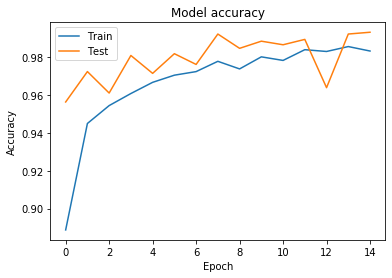

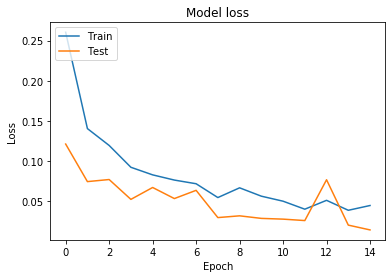

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
model.evaluate(X_test,y_test,verbose=2 )

1320/1 - 0s - loss: 0.0172 - accuracy: 0.9833


[0.03368703856020037, 0.98333335]

In [0]:
# Now we will save neural network structure and the trained weights

model_structure = model.to_json()
f = Path("model_structure.json")    #Structure

f.write_text(model_structure)
model.save_weights("model_weights.h5")      #Trained weights